In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from numpy import dstack
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#x_train  y_train to train
#x_test   y_test to test
#video
import joblib
x_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/x_test')
x_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/x_train')
y_test = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/labels_train')

#audio

x_audio_test = joblib.load('/content/drive/My Drive/fusion/audio/data_set_fusion/expert1/x_test')
x_audio_train = joblib.load('/content/drive/My Drive/fusion/audio/data_set_fusion/expert1/x_train')

In [37]:
len(x_test),len(x_train),len(x_audio_test),len(x_audio_train)

(207, 1860, 207, 1860)

In [38]:
import pandas as pd

x_train = pd.concat([x_train, x_audio_train], axis=1,join='inner')
x_test =  pd.concat([x_test, x_audio_test], axis=1,join='inner')

In [39]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,9.883354e-01,0.007682,0.000010,0.003067,0.000143,0.000763,1.000000e+00,7.922875e-14,1.068409e-14,1.045802e-09,3.321151e-08,1.355659e-10
1,1.501772e-03,0.012143,0.000139,0.685228,0.002173,0.298815,8.495387e-17,2.054941e-15,1.301076e-17,9.999865e-01,3.175999e-15,1.343040e-05
2,9.311091e-07,0.000201,0.999669,0.000046,0.000003,0.000080,5.961114e-11,1.292017e-11,9.796673e-01,9.336164e-07,1.062155e-09,2.033180e-02
3,1.096132e-04,0.000158,0.000176,0.951691,0.001256,0.046609,1.091121e-03,5.416599e-05,2.768819e-05,7.518284e-03,2.163325e-02,9.696754e-01
4,2.936176e-05,0.000147,0.000104,0.001115,0.000087,0.998517,7.539627e-10,1.306152e-01,3.597291e-07,8.674391e-01,1.847878e-08,1.945399e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
202,6.101698e-06,0.000008,0.000025,0.000990,0.001861,0.997110,1.113496e-12,6.099670e-15,2.628305e-07,5.887379e-05,9.668675e-04,9.989740e-01
203,1.317677e-06,0.000727,0.998584,0.000076,0.000004,0.000608,6.802213e-13,2.003837e-11,9.990632e-01,2.994884e-08,9.367879e-04,6.965141e-10
204,2.726826e-05,0.000061,0.000011,0.002894,0.957085,0.039922,1.476629e-06,1.517833e-05,4.432565e-04,4.397349e-03,9.627864e-01,3.235621e-02
205,1.630764e-05,0.000027,0.000006,0.009704,0.984643,0.005603,2.188796e-15,2.927605e-14,6.668694e-12,2.118203e-15,9.999996e-01,3.792794e-07


In [40]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OV_5,OA_0,OA_1,OA_2,OA_3,OA_4,OA_5
0,5.598458e-07,0.000242,0.999635,0.000035,0.000002,0.000085,1.327006e-21,3.841660e-09,1.000000e+00,3.664570e-13,3.521986e-16,3.534696e-21
1,9.833587e-01,0.012549,0.000054,0.003013,0.000121,0.000904,9.992583e-01,6.875026e-04,2.436316e-05,2.932456e-05,2.102926e-08,4.196089e-07
2,1.119722e-03,0.990240,0.008252,0.000270,0.000003,0.000115,6.608485e-15,9.999915e-01,8.478674e-06,5.966239e-15,2.677607e-15,8.220543e-13
3,2.972650e-01,0.697070,0.001281,0.003364,0.000808,0.000213,7.821160e-12,1.000000e+00,2.164655e-11,1.262032e-08,3.767564e-20,4.630951e-08
4,3.326385e-05,0.000037,0.000002,0.004697,0.986269,0.008962,1.000515e-11,1.811278e-14,1.224685e-09,5.038476e-15,1.000000e+00,3.680516e-11
...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1.769513e-05,0.001562,0.000373,0.991158,0.000057,0.006832,2.259942e-05,7.161053e-06,4.295890e-04,9.993572e-01,6.365854e-07,1.828746e-04
1856,9.822664e-01,0.013448,0.000027,0.002729,0.000102,0.001428,9.999810e-01,1.845610e-05,8.724965e-13,5.144408e-07,3.995520e-08,6.905096e-13
1857,3.059891e-05,0.000335,0.000016,0.006319,0.988687,0.004612,1.232872e-07,5.017451e-08,2.011137e-04,1.691827e-04,9.984006e-01,1.228817e-03
1858,6.537375e-07,0.000264,0.999439,0.000034,0.000002,0.000260,3.271191e-13,1.457301e-11,9.996771e-01,1.908615e-06,3.211021e-04,2.931647e-08


In [44]:
y_test,len(y_test)

(array([0, 3, 2, 5, 5, 2, 5, 1, 4, 0, 3, 1, 4, 0, 4, 3, 4, 1, 1, 1, 5, 2,
        0, 2, 2, 5, 3, 5, 5, 5, 5, 4, 5, 0, 2, 2, 4, 1, 5, 4, 2, 2, 1, 5,
        2, 1, 5, 5, 4, 3, 4, 2, 1, 3, 3, 0, 0, 0, 2, 5, 4, 4, 5, 3, 1, 3,
        1, 0, 5, 1, 1, 2, 5, 5, 5, 4, 0, 3, 4, 4, 3, 4, 4, 0, 0, 1, 2, 3,
        3, 5, 5, 1, 0, 1, 5, 5, 1, 2, 5, 3, 4, 3, 3, 5, 4, 3, 2, 1, 4, 1,
        5, 2, 0, 1, 4, 0, 4, 1, 1, 1, 1, 5, 1, 4, 1, 2, 3, 2, 5, 1, 2, 0,
        1, 5, 1, 0, 5, 0, 2, 1, 2, 1, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 5, 3,
        1, 2, 1, 3, 0, 0, 1, 3, 3, 2, 4, 1, 0, 0, 5, 4, 4, 3, 1, 4, 3, 1,
        5, 0, 4, 5, 4, 0, 0, 5, 3, 3, 1, 3, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1,
        4, 5, 3, 2, 5, 2, 4, 4, 1]), 207)

In [43]:
y_train,len(y_train)

(array([2, 0, 1, ..., 4, 2, 3]), 1860)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial')
LR=model.fit(x_train,y_train)
predictions = model.predict(x_test)
#print("Restored model, accuracy: {:5.2f}%".format(100*acc))

In [49]:
predictions

array([0, 3, 2, 3, 5, 2, 5, 1, 4, 0, 3, 1, 4, 0, 0, 3, 4, 1, 1, 1, 5, 2,
       0, 2, 1, 5, 3, 5, 5, 5, 5, 4, 5, 3, 2, 2, 4, 1, 5, 4, 2, 2, 1, 5,
       2, 1, 5, 5, 4, 5, 4, 2, 1, 3, 3, 0, 0, 0, 2, 5, 4, 4, 5, 0, 1, 3,
       1, 3, 5, 1, 1, 2, 5, 3, 5, 4, 0, 3, 4, 5, 3, 4, 4, 0, 0, 1, 2, 5,
       3, 5, 5, 1, 0, 1, 5, 5, 1, 2, 5, 3, 4, 3, 3, 5, 4, 3, 2, 1, 4, 1,
       5, 2, 0, 1, 4, 0, 4, 1, 1, 1, 1, 5, 1, 4, 1, 2, 3, 2, 5, 1, 2, 0,
       1, 5, 1, 0, 5, 0, 2, 1, 2, 1, 2, 3, 1, 2, 3, 0, 0, 3, 2, 3, 5, 3,
       1, 2, 1, 3, 0, 0, 1, 3, 3, 2, 4, 1, 1, 0, 5, 4, 4, 3, 1, 4, 3, 1,
       5, 0, 4, 4, 4, 0, 0, 5, 3, 3, 1, 3, 3, 4, 1, 4, 1, 1, 4, 2, 3, 1,
       4, 5, 3, 2, 5, 2, 4, 4, 1])

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.96      1.00      0.98        44
           2       1.00      0.97      0.98        30
           3       0.89      0.91      0.90        34
           4       0.97      0.94      0.96        34
           5       0.92      0.92      0.92        38

    accuracy                           0.94       207
   macro avg       0.94      0.94      0.94       207
weighted avg       0.94      0.94      0.94       207

----accuracy score 94.20289855072464 ----


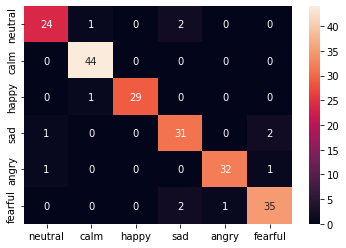

In [50]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','calm', 'happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [52]:
path='/content/drive/My Drive/fusion/fusion_model/logistic_regression/expert1'
savedvX = joblib.dump(model, path)

print("MODEL SAVED")

MODEL SAVED
